In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [75]:
df= pd.read_csv('diabetes.csv')

In [76]:
df.shape

(768, 9)

In [77]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [87]:
def plot_corr(df,size=11):
    corr=df.corr()
    fig,ax=plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)),corr.columns)
    plt.yticks(range(len(corr.columns)),corr.columns)

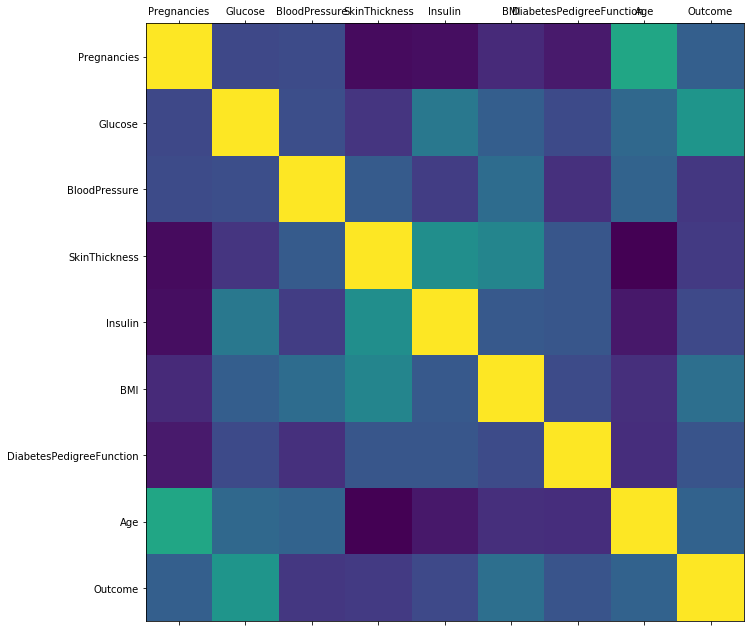

In [88]:
plot_corr(df)

In [82]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [96]:
num_true= len(df.loc[df['Outcome']==True])
num_false=len(df.loc[df['Outcome']==False])
print('Number of True cases:',num_true,(num_true/(num_false+num_true))*100)
print('Number of True cases:',num_false,(num_false/(num_false+num_true))*100)

Number of True cases: 268 34.89583333333333
Number of True cases: 500 65.10416666666666


In [98]:
from sklearn.model_selection import train_test_split

feature_col_names=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
predicted_class_names=['Outcome']

X=df[feature_col_names].values
Y=df[predicted_class_names].values

split_test_size=.30
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=split_test_size,random_state=42)

In [102]:
len(X_train)/(len(X_train)+len(X_test))

0.69921875

In [103]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [104]:
from sklearn.preprocessing import Imputer
fill_0= Imputer(missing_values=0,strategy='mean',axis=0)

X_train=fill_0.fit_transform(X_train)
X_test= fill_0.fit_transform(X_test)

/home/user8/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


# Naive Bayes

In [105]:
from sklearn.naive_bayes import GaussianNB

nb_model=GaussianNB()
nb_model.fit(X_train,Y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

# Performance on training data

In [111]:
nb_predict_train= nb_model.predict(X_train)

from sklearn import metrics

print('Accuracy: ({0:.4f})'.format(metrics.accuracy_score(Y_train,nb_predict_train)))

Accuracy: (0.7542)


# Performance on test data

In [112]:
nb_predict_test= nb_model.predict(X_test)

from skalearn import metrics

print('Accuracy: ({0:.4f})'.format(metrics.accuracy_score(Y_test,nb_predict_test)))

Accuracy: (0.7359)


# Random Forest

In [113]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(random_state=42)
rf_model.fit(X_train,Y_train.ravel())

/home/user8/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

# Predict training data

In [117]:
rf_predict_train= rf_model.predict(X_train)
print('Accuracy: ({0:.4f})'.format(metrics.accuracy_score(Y_train,rf_predict_train)))

Accuracy: (0.9870)


# Predict test data

In [118]:
rf_predict_test=rf_model.predict(X_test)
print('Accuracy: ({0:.4f})'.format(metrics.accuracy_score(Y_test,rf_predict_test)))

Accuracy: (0.7186)


# Logistic Regression

In [121]:
from sklearn.linear_model import LogisticRegression

lr_model=LogisticRegression(C=0.7, random_state=42)
lr_model.fit(X_train,Y_train.ravel())


/home/user8/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.7, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

# Predict training data

In [122]:
lr_predict_train=lr_model.predict(X_train)
print('Accuracy: ({0:.4f})'.format(metrics.accuracy_score(Y_train,lr_predict_train)))

Accuracy: (0.7728)


# Predict test data

In [123]:
lr_predict_test=lr_model.predict(X_test)
print('Accuracy: ({0:.4f})'.format(metrics.accuracy_score(Y_test,lr_predict_test)))

Accuracy: (0.7576)
